<a href="https://colab.research.google.com/github/2024S2-ML/.github/blob/main/doencasCardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,  precision_score, recall_score, f1_score
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('cardio_train (1).csv', delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data.info()

# O comando data.info() é usado para obter uma visão geral rápida sobre um DataFrame no pandas. Quando você executa data.info(), ele fornece as seguintes informações:

# Número de Entradas: O número total de linhas no DataFrame.
# Número de Colunas: O número total de colunas no DataFrame.
# Nome das Colunas: Os nomes das colunas.
# Número de Valores Não Nulos: O número de valores não nulos em cada coluna. Isso ajuda a identificar a presença de dados ausentes.
# Tipo de Dados de Cada Coluna: O tipo de dados (dtype) de cada coluna, como int64, float64, object (para strings), entre outros.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data.describe().T

# O comando data.describe().T fornece uma visão geral das estatísticas descritivas das colunas numéricas de um DataFrame do pandas, com a tabela resultante transposta para facilitar a leitura. Aqui está o detalhamento:

# data.describe()
# O método describe() do pandas gera estatísticas descritivas básicas para as colunas numéricas do DataFrame data. As estatísticas incluem:

# count: Número de valores não nulos.
# mean: Média dos valores.
# std: Desvio padrão dos valores.
# min: Valor mínimo.
# 25%: Primeiro quartil (25% dos dados são menores ou iguais a esse valor).
# 50%: Mediana (50% dos dados são menores ou iguais a esse valor).
# 75%: Terceiro quartil (75% dos dados são menores ou iguais a esse valor).
# max: Valor máximo

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


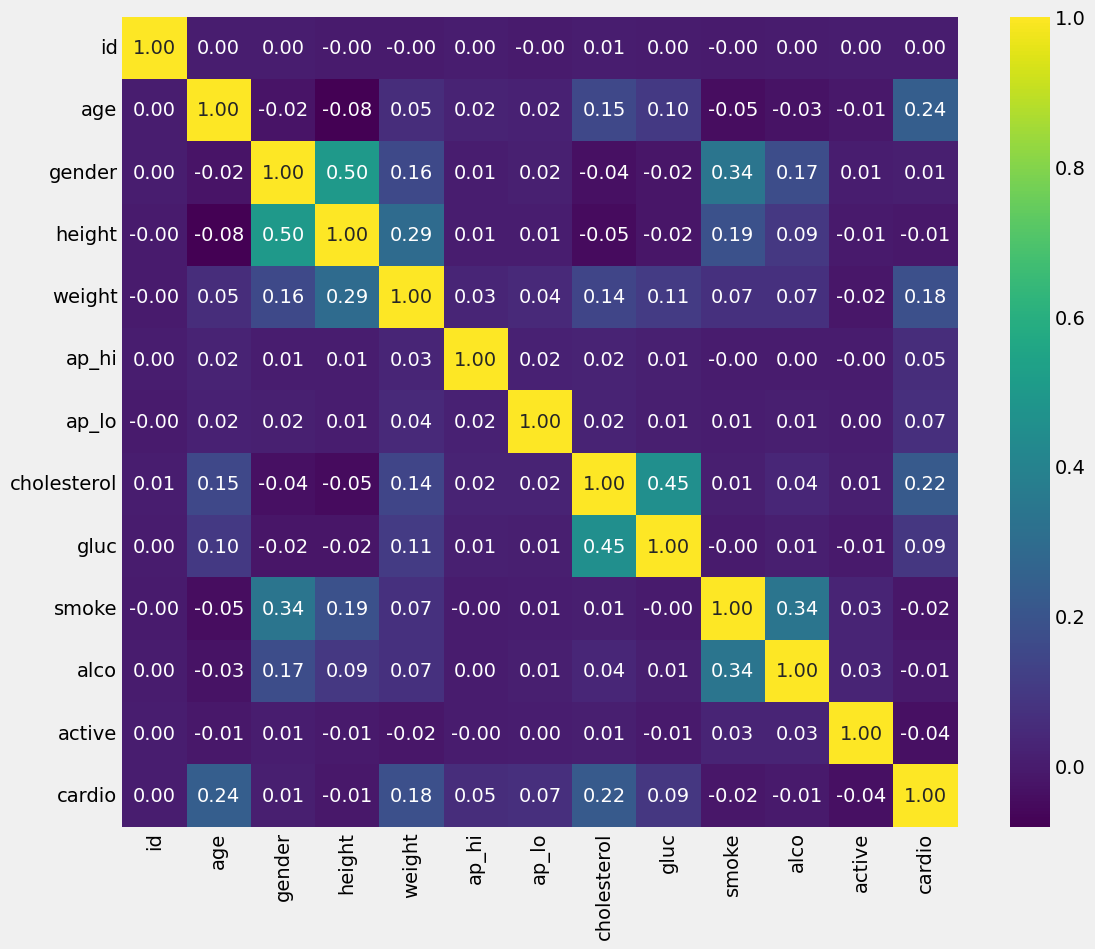

In [ ]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

# plt.style.use('fivethirtyeight')` Define o estilo dos gráficos do Matplotlib para `fivethirtyeight`, que é um estilo visual inspirado no design do FiveThirtyEight, um site de estatísticas e análise

# plt.figure(figsize=(12, 10))`**: Cria uma nova figura para o gráfico com um tamanho especificado de 12 unidades de largura e 10 unidades de altura. Isso define o tamanho da área onde o gráfico será desenhado

# 3. **`sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='viridis')`**: - **`sns.heatmap()`**: Cria um mapa de calor usando a biblioteca Seaborn. - **`data.corr()`**: Calcula a matriz de correlação entre todas as colunas numéricas do DataFrame `data`. A matriz de correlação mostra como cada par de variáveis está correlacionado, com valores variando de -1 (correlação negativa perfeita) a +1 (correlação positiva perfeita).


In [ ]:
print(f'Good People : {data.cardio.value_counts()[0]}')
print(f'Infected People : {data.cardio.value_counts()[1]}')

Good People : 35021
Infected People : 34979


In [ ]:
data['age'] = data['age'] / 365.25
data['age'] = data['age'].astype('int64')

In [ ]:
#Clculate age
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 64 mean = 52.80325714285714


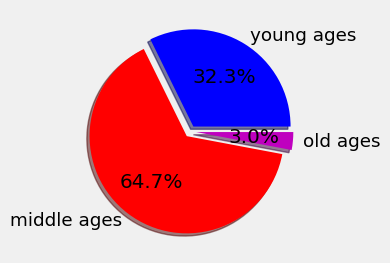

In [ ]:
# Esses comandos preparam e visualizam uma análise da distribuição etária dos dados usando um gráfico de pizza (pie chart). Vamos detalhar o que cada linha faz:

# 1. Preparação dos Dados
# Young = data[(data.age>=29)&(data.age<50)]
# Cria um novo DataFrame Youngconte
# Middle = data[(data.age>=50)&(data.age<63)]
# Cria um novo DataFrame Middle contendo apenas os registros em que a idade está entre 50 e 62 anos (inclusive 50 e excluso 63).
# Old = data[(data.age>63)]
# Cria um novo DataFrame Old contendo apenas os registros em que a idade é maior que 63 anos.
# Essas linhas categorizam os dados de acordo com três faixas etárias: jovens, meia-idade e idosos.

# 2. Configuração do Gráfico
# plt.style.use('fivethirtyeight')

# Define o estilo do gráfico para fivethirtyeight, que oferece um design visual limpo e moderno.
# colors = ['b','r','m']

# Define a lista de cores a serem usadas no gráfico de pizza: azul ('b'), vermelho ('r'),'m').
# explode = [0.06,0.06,0.06]

# Cria uma lista de valores para "explodir" cada fatia do gráfico de pizza. O valor 0.06 faz com que cada fatia seja destacada do centro por uma pequena distância, ajudando a diferenciá-las visualmente.
# plt.figure(figsize=(5,3))

# Cri
# sns.set_context('notebook', font_scale = 1.2)

# Define o contexto do gráfico para notebook com uma escala de fonte de 1.2. Isso ajusta o tamanho da fonte para tornar o texto mais legível em um ambiente de notebook Jupyter.
# 3. Criação do Gráfico de Pizza
# plt.pie([len(Young), len(Middle), len(Old)], labels=['young ages', 'middle ages', 'old ages'], explode=explode, shadow=True, colors=colors, autopct='%1.1f%%')
# plt.pie(): Cria um gráfico de pizza.
# [len(Young), len(Middle), len(Old)]:
# labels=['young ages', 'middle ages', 'old ages']: De
# explode=explode: Aplicar
# shadow=True:
# colors=colors:
# autopct='%1.1f%%': Ordinário
# 4. Exibição do Gráfico
# plt.show()
# Exibe o gráfico de pizza gerado.

#Prepare ages for a bie chart
Young = data[(data.age>=29)&(data.age<50)]
Middle = data[(data.age>=50)&(data.age<63)]
Old = data[(data.age>63)]
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.06,0.06,0.06]
plt.figure(figsize=(5,3))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

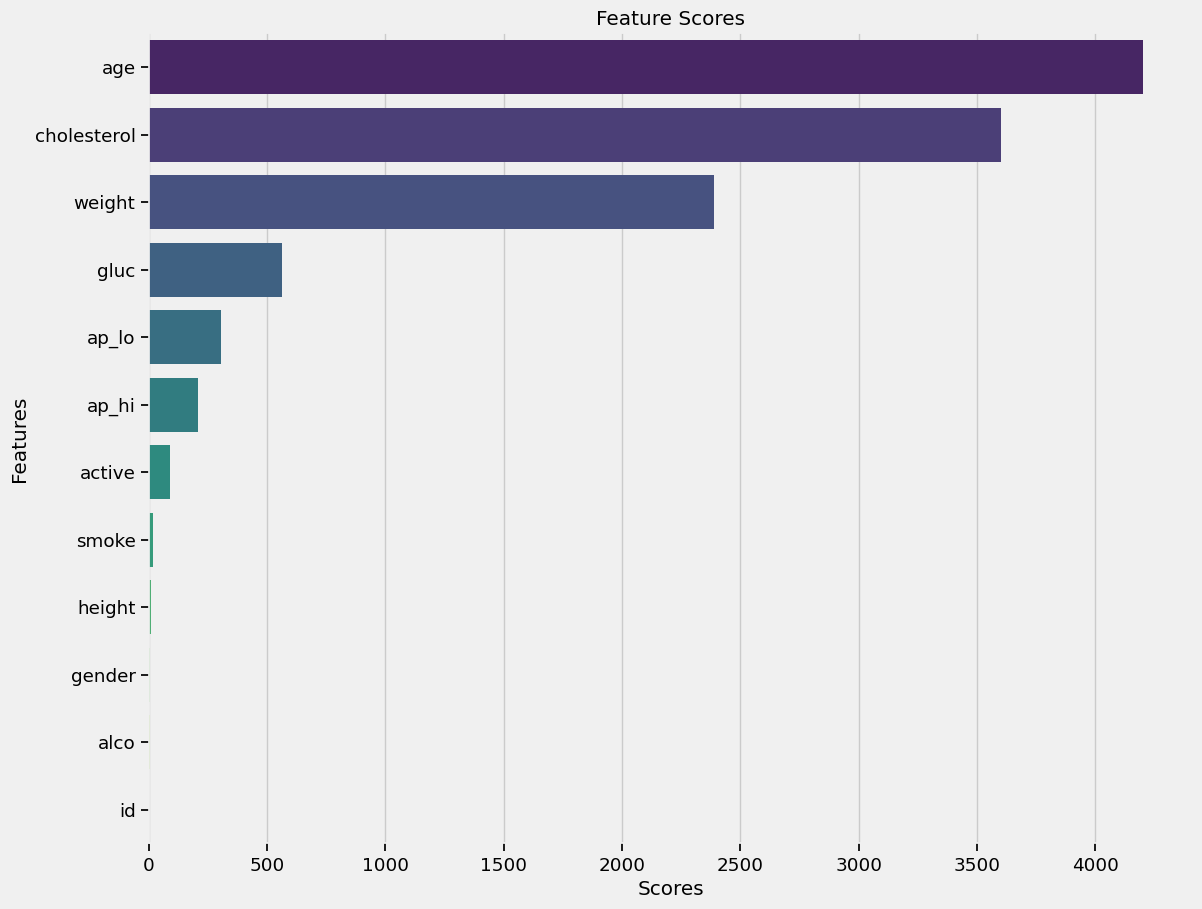

In [ ]:
# Esses comandos realizam a seleção de características (feature selection) usando a técnica SelectKBest com o método ANOVA F-value e visualizam os resultados em um gráfico de barras. Vamos analisar o que cada parte faz:

# 1. Preparação dos Dados
# X = data.drop(["cardio"], axis=1)

# Remover a coluna cardiodo Datdata para criar o conjunto de características X.cardioé
# y = data["cardio"]

# Definirycomcardio, que é a variável alvo que você está tentando prever.
# 2. Escalonamento dos Dados
# scale = MinMaxScaler()

# Cria um objeto MinMaxScaler que irá escalar as características para um intervalo específico, normalmente entre 0 e 1.
# scale.fit(X)

# Ajusta o MinMaxScaler às características X. EUX.
# 3. Seleção de Características
# selector = SelectKBest(f_classif, k=12)

# Cria um objeto SelectKBest usando o método f_classif, que é uma técnica de seleção de características baseada na análise de variância (ANOVA) com o valor F. O parâmetro k=12é
# X_selected = selector.fit_transform(X, y)

# Aplica o SelectKBest aos dados Xe'yy. O método fit_transformtambémSelectKBest aos dados e transforma Xbem
# selected_features = X.columns[selector.get_support()]

# Obtém os nomes das características selecionadas que foram consideradas as melhores, de acordo com os resultados do seletor.
# feature_scores = selector.scores_[selector.get_support()]

# Obtém os escores F para as características selecionadas. O selector.scores_comselector.get_support()desafio
# 4. Criação e Ordenação do DataFrame
# feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Cria um DataFrame que armazena os nomes das características selecionadas e seus respectivos escores.
# feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Ordena o DataFrame pelos escores de forma decrescente, para que as características com escores mais altos apareçam no topo.
# 5. Visualização
# plt.figure(figsize=(12, 10))

# Cria uma nova figura com um tamanho de 12 unidades de largura e 10 unidades de altura para o gráfico.
# sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')

# Cria um gráfico de barras usando o seaborn. O eixo x representa os escores das características, e o eixo y representa os nomes das características. A paleta de cores viridis é usada para a coloração das barras.
# plt.title('Feature Scores')

# ou seja
# plt.xlabel('Scores')

# Adiciona um rótulo ao eixo x.
# plt.ylabel('Features')

# eu fui adicionado
# plt.show()

# Exibe o gráfico criado.
# Resumo
# Esses comandos realizam a seleção das 12 melhores características do DataFrame data com base na análise de variância (ANOVA) F-value. Após a seleção, os escores das características selecionadas são visualizados em um gráfico de barras, mostrando quais características têm maior importância relativa para o modelo, de acordo com o teste ANOVA.

# Feature selection using SelectKBest with ANOVA F-value
X = data.drop(["cardio"], axis = 1)
y = data["cardio"]
scale=MinMaxScaler()
scale.fit(X)
selector = SelectKBest(f_classif, k=12)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]
# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})
# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

In [ ]:
# Splitting the data
X = X.drop(["id","alco","height","gender","smoke","active"], axis = 1)

In [ ]:
# O comandoX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)dividir

# 1. Função train_test_split
# train_test_split(X, y, test_size=0.2, random_state=42):
# X:
# y: A série ou array que contém a variável alvo (target) que você deseja prever.
# test_size=0.2:
# random_state=42: Definir
# 2. Saídas da Função
# X_train: Definir
# X_test:
# y_train: ComX_train.
# y_test: ComX_test.
# Resumo
# Objetivo : D
# Proporção: 80% dos dados são usados para treinamento e 20% para teste.
# Reprodutibilidade: A semente aleatória garante que a divisão seja consistente em execuções subsequentes.

#Essa divisão permite que você treine o modelo em um subconjunto dos dados e avalie seu desempenho em um subconjunto separado, ajudando a evitar o overfitting e proporcionando uma medida mais confiável da capacidade de generalização do modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Esses comandos configuram e treinam um modelo KNN com uma busca exaustiva por hiperparâmetros, ajudando a encontrar a melhor configuração para o classificador. O uso da validação cruzada e processamento paralelo melhora a robustez e a eficiência da otimização dos hiperparâmetros.

clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [ ]:
# Esses passos são comuns em fluxos de trabalho de aprendizado de máquina para garantir que você está usando o melhor modelo disponível e para avaliar seu desempenho em dados não vistos.

best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confution matrix for model " f'{best_model_knn} : \n',cm_knn)
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Confution matrix for model KNeighborsClassifier(metric='manhattan', n_neighbors=11) : 
 [[5150 1838]
 [2187 4825]]
Accuracy score for model KNeighborsClassifier(metric='manhattan', n_neighbors=11) :  0.7125
classification_report for model KNeighborsClassifier(metric='manhattan', n_neighbors=11) : 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      6988
           1       0.72      0.69      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Corrigir o nome do arquivo e carregar os dados
data = pd.read_csv('/content/cardio_train (1).csv', delimiter=';')

# Verificar se os dados foram carregados corretamente
print(data.head())

# Preparar os dados
X = data.drop(["cardio"], axis=1)  # Recursos
y = data["cardio"]  # Rótulos

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificar as dimensões dos conjuntos de treino e teste
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
Shape of X_train: (56000, 12)
Shape of X_test: (14000, 12)
Shape of y_train: (56000,)
Shape of y_test: (14000,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Criar e treinar o modelo SVM
model = SVC(kernel='rbf', random_state=42)  # Usando o kernel RBF, você pode experimentar com outros kernels
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir os resultados
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[5325 1663]
 [2119 4893]]
Accuracy Score: 0.7298571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



Saving heart.csv to heart.csv
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Acurácia: 0.81

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81 

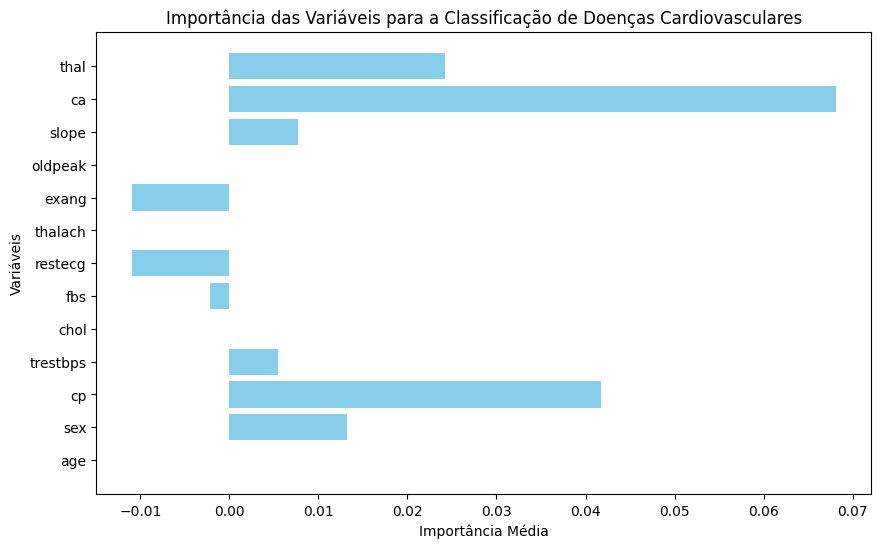

In [ ]:
# DATASET MENOR



# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# 1. Solicitar o upload do arquivo
uploaded = files.upload()

# O nome do arquivo pode ser obtido a partir da variável 'uploaded'
# Vamos pegar o nome do primeiro arquivo enviado
filename = list(uploaded.keys())[0]

# Carregar o dataset
data = pd.read_csv(filename)

# Exibir as primeiras linhas do dataset
print(data.head())

# 2. Pré-processamento dos dados
# - Tratar valores ausentes (substituindo com a média, se houver)
data.fillna(data.mean(), inplace=True)

# - Codificar variáveis categóricas (ex: 'sex', 'cp', etc.)
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['fbs'] = encoder.fit_transform(data['fbs'])
data['restecg'] = encoder.fit_transform(data['restecg'])
data['exang'] = encoder.fit_transform(data['exang'])
data['slope'] = encoder.fit_transform(data['slope'])
data['ca'] = encoder.fit_transform(data['ca'])
data['thal'] = encoder.fit_transform(data['thal'])

# 3. Separar as variáveis independentes (X) e a variável dependente (y)
X = data.drop('target', axis=1)  # Excluindo a coluna 'target' (classificação de doença)
y = data['target']  # Variável target: 0 (sem doença) ou 1 (com doença)

# 4. Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Construção do modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# 8. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# 9. Calcular a importância das variáveis usando Permutation Importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# 10. Exibir o gráfico de importância das variáveis
importance = result.importances_mean
features = X.columns

# Gráfico de importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importância Média')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis para a Classificação de Doenças Cardiovasculares')
plt.show()


In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# 1. Solicitar o upload do arquivo
uploaded = files.upload()

# O nome do arquivo pode ser obtido a partir da variável 'uploaded'
# Vamos pegar o nome do primeiro arquivo enviado
filename = list(uploaded.keys())[0]

# Carregar o dataset (ajuste o delimitador se necessário)
data = pd.read_csv(filename, delimiter=';')  # Se o arquivo usar ponto e vírgula

# Exibir as primeiras linhas do dataset
print(data.head())

# 2. Pré-processamento dos dados
# Remover a coluna 'id', que não é relevante para a predição
data = data.drop('id', axis=1)

# - Tratar valores ausentes (substituindo com a média, se houver)
data = data.apply(pd.to_numeric, errors='coerce')  # Converte todas as colunas para numérico, se possível
data.fillna(data.mean(), inplace=True)  # Substitui valores ausentes pela média das colunas

# - Codificar variáveis categóricas (ex: 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active')
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])  # 'gender' será 0 para feminino e 1 para masculino
data['cholesterol'] = encoder.fit_transform(data['cholesterol'])
data['gluc'] = encoder.fit_transform(data['gluc'])
data['smoke'] = encoder.fit_transform(data['smoke'])
data['alco'] = encoder.fit_transform(data['alco'])
data['active'] = encoder.fit_transform(data['active'])

# 3. Separar as variáveis independentes (X) e a variável dependente (y)
X = data.drop('cardio', axis=1)  # Excluindo a coluna 'cardio' (classificação de doença)
y = data['cardio']  # Variável target: 0 (sem doença) ou 1 (com doença cardiovascular)

# 4. Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Construção do modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# 8. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# 9. Calcular a importância das variáveis usando Permutation Importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# 10. Exibir o gráfico de importância das variáveis
importance = result.importances_mean
features = X.columns

# Gráfico de importância das variáveis
plt.figure(figsize=(10, 6))


Saving cardio_train.csv to cardio_train (1).csv
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
Acurácia: 0.73

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75     10461
           1       0.77      0.64      0.70     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.72     2100

In [4]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, delimiter=';')  # Se o arquivo usar ponto e vírgula
data = data.drop('id', axis=1)

data = data.apply(pd.to_numeric, errors='coerce')  # Converte todas as colunas para numérico, se possível
data.fillna(data.mean(), inplace=True)  # Substitui valores ausentes pela média das colunas

# - Codificar variáveis categóricas (ex: 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active')
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])  # 'gender' será 0 para feminino e 1 para masculino
data['cholesterol'] = encoder.fit_transform(data['cholesterol'])
data['gluc'] = encoder.fit_transform(data['gluc'])
data['smoke'] = encoder.fit_transform(data['smoke'])
data['alco'] = encoder.fit_transform(data['alco'])
data['active'] = encoder.fit_transform(data['active'])

# 3. Separar as variáveis independentes (X) e a variável dependente (y)
X = data.drop('cardio', axis=1)  # Excluindo a coluna 'cardio' (classificação de doença)
y = data['cardio']  # Variável target: 0 (sem doença) ou 1 (com doença cardiovascular)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Construção do modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# 8. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# 9. Calcular a importância das variáveis usando Permutation Importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# 10. Exibir o gráfico de importância das variáveis
importance = result.importances_mean
features = X.columns

# Gráfico de importância das variáveis
plt.figure(figsize=(10, 6))

Saving cardio_train.csv to cardio_train (2).csv
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
Acurácia: 0.73

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      5860
           1       0.78      0.64      0.71      5905

    accuracy                           0.73     11765
   macro avg       0.74      0.73      0.73     1176

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Saving cardio_train.csv to cardio_train (3).csv
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
Acurácia: 0.73

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      5860
           1       0.78      0.64      0.71      5905

    accuracy                           0.73     11765
   macro avg       0.74      0.73      0.73     1176

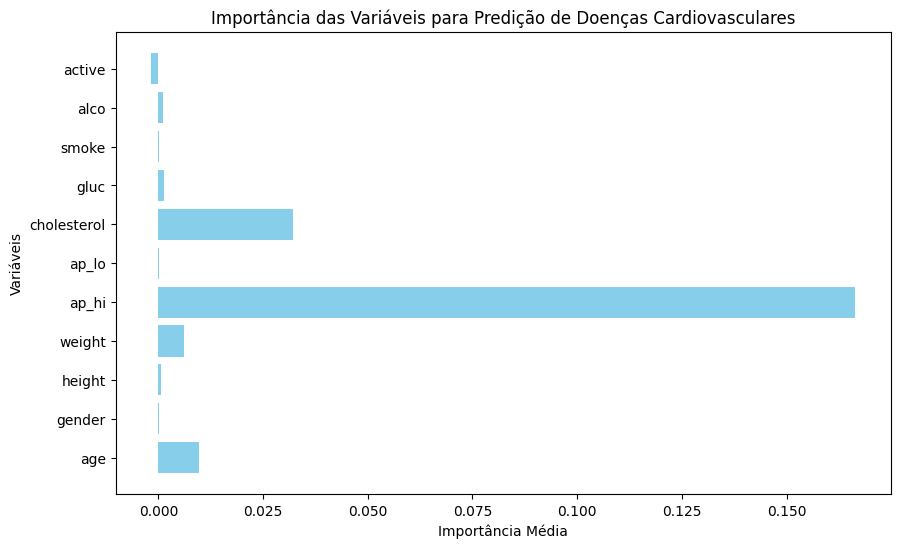

In [5]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# 1. Solicitar o upload do arquivo
uploaded = files.upload()

# O nome do arquivo pode ser obtido a partir da variável 'uploaded'
# Vamos pegar o nome do primeiro arquivo enviado
filename = list(uploaded.keys())[0]

# Carregar o dataset (ajuste o delimitador se necessário)
data = pd.read_csv(filename, delimiter=';')  # Se o arquivo usar ponto e vírgula

# Exibir as primeiras linhas do dataset
print(data.head())

# 2. Pré-processamento dos dados
# Remover a coluna 'id', que não é relevante para a predição
data = data.drop('id', axis=1)

# - Tratar valores ausentes (substituindo com a média, se houver)
data = data.apply(pd.to_numeric, errors='coerce')  # Converte todas as colunas para numérico, se possível
data.fillna(data.mean(), inplace=True)  # Substitui valores ausentes pela média das colunas

# - Codificar variáveis categóricas (ex: 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active')
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])  # 'gender' será 0 para feminino e 1 para masculino
data['cholesterol'] = encoder.fit_transform(data['cholesterol'])
data['gluc'] = encoder.fit_transform(data['gluc'])
data['smoke'] = encoder.fit_transform(data['smoke'])
data['alco'] = encoder.fit_transform(data['alco'])
data['active'] = encoder.fit_transform(data['active'])

# 3. Separar as variáveis independentes (X) e a variável dependente (y)
X = data.drop('cardio', axis=1)  # Excluindo a coluna 'cardio' (classificação de doença)
y = data['cardio']  # Variável target: 0 (sem doença) ou 1 (com doença cardiovascular)

# 4. Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Construção do modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# 8. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# 9. Calcular a importância das variáveis usando Permutation Importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# 10. Exibir o gráfico de importância das variáveis
importance = result.importances_mean
features = X.columns

# Gráfico de importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importância Média')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis para Predição de Doenças Cardiovasculares')
plt.show()  # Isso garante que o gráfico seja exibido
